In [1]:
import sys
import numpy as np
from random import randint
from scipy.spatial import distance
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import defaultdict

class KMeans:
    def __init__(self,file_name,k,choice,iterations,indices):
        self.file_name = file_name
        self.k = k
        self.choice = choice
        self.iterations = iterations
        self.indices = indices

    
    def choices(self,attributes):
        centroids = []
        if self.choice == 1:
            for index in self.indices:
                centroids.append(attributes[index-1])
        elif self.choice == 2:
            selected_centroids = np.random.choice(attributes.shape[0], self.k, replace=False)
            centroids = attributes[selected_centroids, :]
        return centroids



    def calculateJacRand(self,ground_truth,cluster_assignment,data_array):
        true_pos = 0
        true_neg = 0
        false_pos=0
        false_neg=0
        for i in range(len(data_array)):
            for j in range(len(data_array)):
                if ground_truth[i]==ground_truth[j]:
                    if cluster_assignment[i]==cluster_assignment[j]:
                        true_pos=true_pos+1
                    else:
                        false_neg=false_neg+1
                elif ground_truth[i]!=ground_truth[j]:
                    if cluster_assignment[i]==cluster_assignment[j]:
                        false_pos=false_pos+1
                    else:
                        true_neg=true_neg+1
        jaccard_value=(true_pos)/(true_pos+false_pos+false_neg)
        rand_index_value=(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
        return jaccard_value,rand_index_value



    def graph_plot(self,cluster_assignment,attributes):
        rows,cols = attributes.shape
        if cols <= 2 :
            pca_plot_matrix = attributes
        else : 
            pca_plot_matrix = PCA(n_components=2).fit_transform(attributes)
        plot_unique_labels = list(set(cluster_assignment))
        unique_naming_list_1=[]

        colours_unique_vector = cm.Set1(np.linspace(0, 1, len(plot_unique_labels)))
        for i in range(len(plot_unique_labels)):
            dis_rows_index = np.where(cluster_assignment==plot_unique_labels[i])

            dis_rows = pca_plot_matrix[dis_rows_index]
            x_plot =[dis_rows[:,0]]
            y_plot = [dis_rows[:,1]]
            unique_naming_list_1.append(plt.scatter(x_plot, y_plot, c=colours_unique_vector[i]))

        plot_unique_labels=[-1.0 if x==0 else x for x in plot_unique_labels]
        plot_unique_labels=np.array(plot_unique_labels,dtype=int)

        plt.legend(unique_naming_list_1,plot_unique_labels,loc="best",ncol=1,markerfirst=True,shadow=True)
        plt.xlabel("PC 1")
        plt.ylabel("PC 2")
        plt.title("K means clustering using PCA Graph Plot ",fontweight="bold")
        plt.show()


    def kmeans(self):
        with open(self.file_name, "r") as file:
            lines = file.readlines()
            data = []
            centroids = []
            for line in lines:
                datas = line.strip().split()
                data.append(datas)

            data_array = np.asarray(data, dtype = float)
            gene_id = data_array[:,0]
            ground_truth = data_array[:,1]
            attributes = np.delete(data_array,np.s_[0:2],axis = 1)
            labels = [0]*(len(data_array))
            centroids = self.choices(attributes)
            for i in range(iterations):
                clusters = defaultdict(list)
                centroids_updated =[]
                for j in range(attributes.shape[0]):
                    distances = float('inf')
                    centroid_choice = None
                    for l in range(len(centroids)):
                        current_distance = distance.euclidean(attributes[j],centroids[l])
                        if current_distance < distances:
                            distances = current_distance
                            centroid_choice = l
                    clusters[centroid_choice].append(j)

                for l in range(len(centroids)):
                    relevant_attributes = attributes[clusters[l],:]
                    if len(relevant_attributes) == 0:
                        centroids_updated.append(centroids[l])
                    else:
                        centroids_updated.append(np.mean(relevant_attributes , axis= 0))
                if np.array_equal(centroids , centroids_updated):
                    break
                else:
                    centroids = centroids_updated

                for key , value in clusters.items():
                    for elements in value:
                        labels[elements] = key+1
                            
                            
            cluster_assignment=np.asarray(labels,dtype=int)

            #plotting using PCA
            self.graph_plot(cluster_assignment,attributes)

        return ground_truth,cluster_assignment,data_array


Enter the file name : cho.txt
Enter the number of clusters (k value) : 5
Enter 1 to manually enter the centroids and 2 to randomly choose the centroids : 1
Enter the 5 ID: 23
Enter the 4 ID: 12
Enter the 3 ID: 43
Enter the 2 ID: 44
Enter the 1 ID: 21
Enter the Number of iterations : 32


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

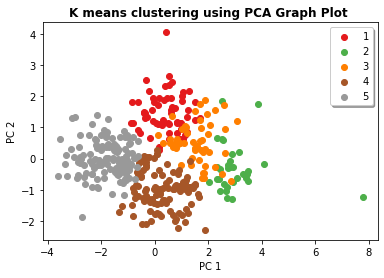

Jaccard Coefficient =  0.39266091051805335
Rand Index =  0.7922763027195361


In [3]:
file_name = input("Enter the file name : ")
k = int(input("Enter the number of clusters (k value) : "))
choice = int(input("Enter 1 to manually enter the centroids and 2 to randomly choose the centroids : "))
indices = []

if choice == 1:
    count = k
    while count > 0 :
        index = int(input("Enter the "+str(count)+" ID: "))
        indices.append(index)
        count -= 1
iterations = int(input("Enter the Number of iterations : "))
kcluster = KMeans(file_name,k,choice,iterations,indices)
ground_truth,cluster_assignment,data_array = kcluster.kmeans()
                 
jaccard_value,rand_index_value=kcluster.calculateJacRand(ground_truth,cluster_assignment,data_array)

print("Jaccard Coefficient = ",jaccard_value)
print("Rand Index = ",rand_index_value)